In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


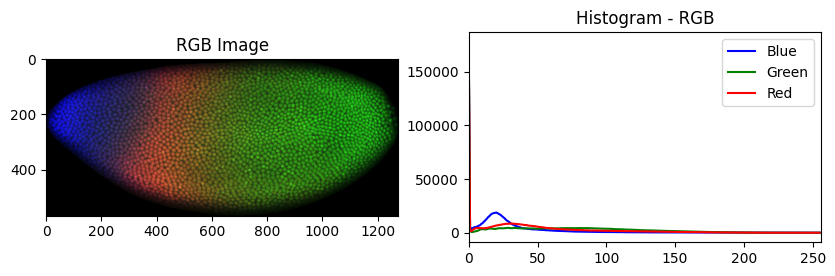

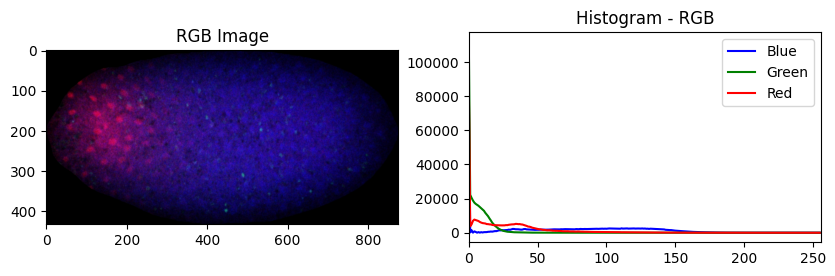

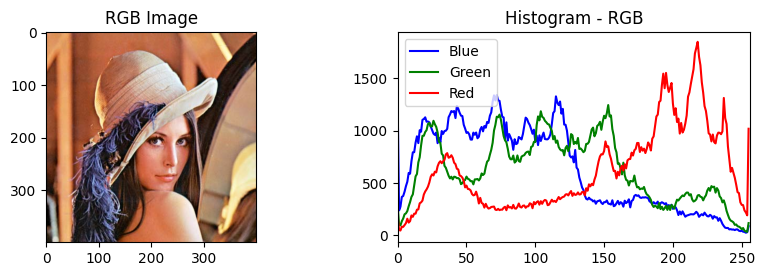

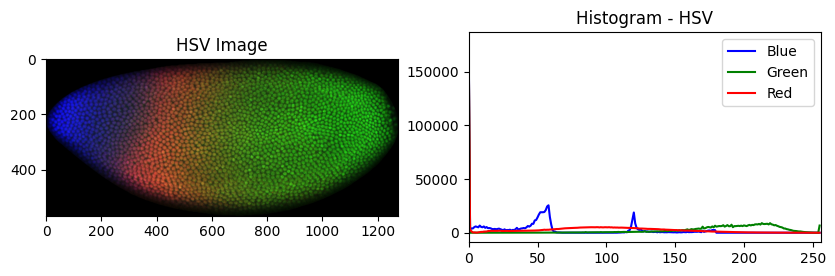

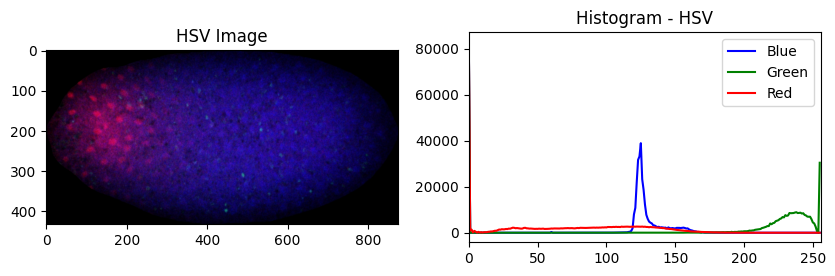

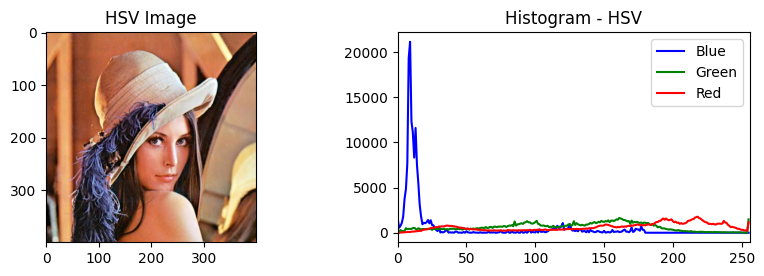

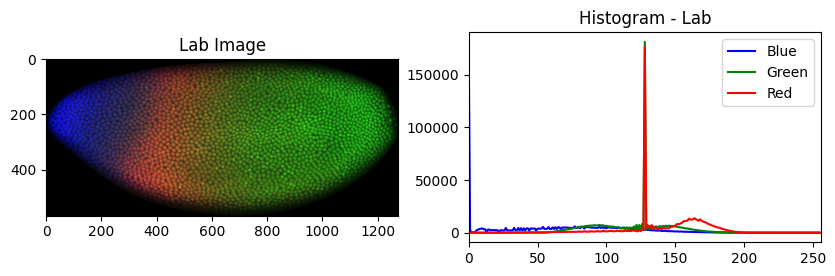

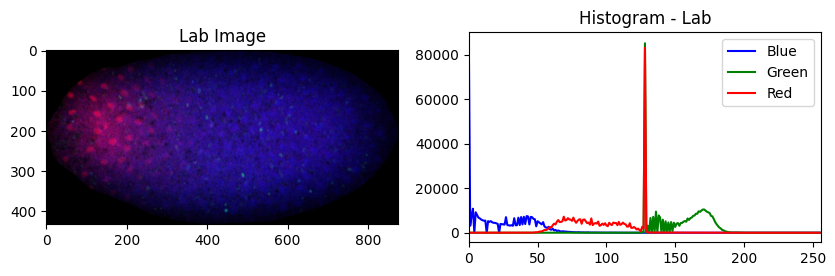

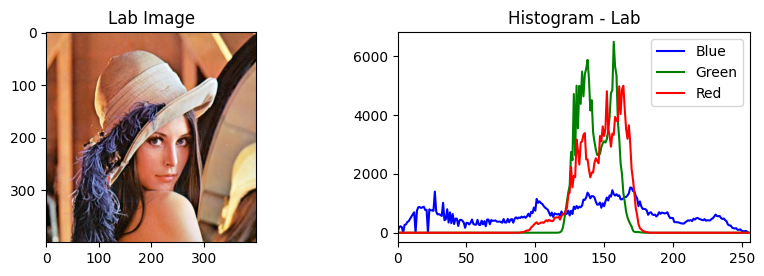

In [3]:
def show_image_histogram(image, title):
 
    channels = cv2.split(image)
    colors = ('b', 'g', 'r')
    labels = ('Blue', 'Green', 'Red')

    for channel, color, label in zip(channels, colors, labels):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color, label=label)
        plt.xlim([0, 256])

    plt.title(title)
    plt.legend()
    plt.show()

image_rgb = cv2.imread('image.jpg')
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2Lab)

image_rgb1 = cv2.imread('image2.jpg')
image_hsv1 = cv2.cvtColor(image_rgb1, cv2.COLOR_BGR2HSV)
image_lab1 = cv2.cvtColor(image_rgb1, cv2.COLOR_BGR2Lab)

image_rgb2 = cv2.imread('Lenna.jpg')
image_hsv2 = cv2.cvtColor(image_rgb2, cv2.COLOR_BGR2HSV)
image_lab2 = cv2.cvtColor(image_rgb2, cv2.COLOR_BGR2Lab)

#rgb
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('RGB Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_rgb, 'Histogram - RGB')

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb1, cv2.COLOR_BGR2RGB))
plt.title('RGB Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_rgb1, 'Histogram - RGB')

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb2, cv2.COLOR_BGR2RGB))
plt.title('RGB Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_rgb2, 'Histogram - RGB')


# hsv
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
plt.title('HSV Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_hsv, 'Histogram - HSV')

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_hsv1, cv2.COLOR_HSV2RGB))
plt.title('HSV Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_hsv1, 'Histogram - HSV')

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_hsv2, cv2.COLOR_HSV2RGB))
plt.title('HSV Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_hsv2, 'Histogram - HSV')

# lab
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_lab, cv2.COLOR_Lab2RGB))
plt.title('Lab Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_lab, 'Histogram - Lab')

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_lab1, cv2.COLOR_Lab2RGB))
plt.title('Lab Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_lab1, 'Histogram - Lab')

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image_lab2, cv2.COLOR_Lab2RGB))
plt.title('Lab Image')

plt.subplot(2, 2, 2)
show_image_histogram(image_lab2, 'Histogram - Lab')


plt.show()

2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

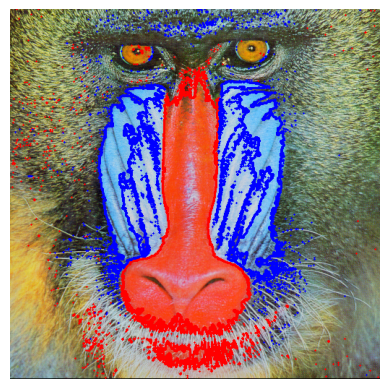

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem do mandril
image_path = 'mandrill.tiff'
image = cv2.imread(image_path)

# Converter a imagem para o espaço de cores HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir os limites para a cor vermelha
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Definir os limites para a cor azul
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Aplicar a limiarização para obter as máscaras de vermelho e azul
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Encontrar os contornos das regiões vermelha e azul
red_contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar os contornos na imagem original
cv2.drawContours(image, red_contours, -1, (0, 0, 255), 2)
cv2.drawContours(image, blue_contours, -1, (255, 0, 0), 2)

# Exibir a imagem resultante
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

Melhor canal:  B


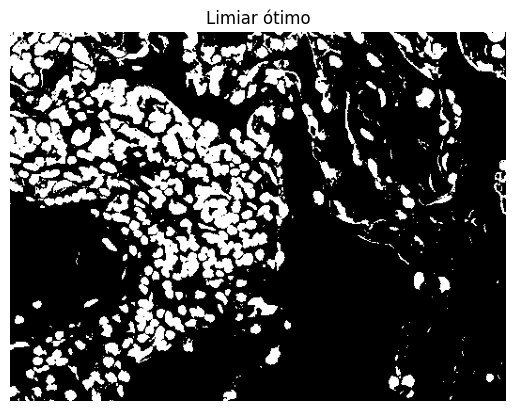

Quantidade de núcleos celulares:  515


In [17]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)

# Converter a imagem para o espaço de cores HSV, LAB e RGB
hsv_image_he = cv2.cvtColor(img_he, cv2.COLOR_BGR2HSV)
lab_image_he = cv2.cvtColor(img_he, cv2.COLOR_BGR2LAB)
rgb_image_he = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)

# Definir uma lista com os canais de cores a serem avaliados
color_channels = ['R', 'G', 'B', 'H', 'S', 'V', 'L', 'a', 'b']

# Inicializar variáveis para armazenar os resultados de cada canal
best_channel = None
best_threshold = 0
best_nuclei_count = 0

# Iterar sobre os canais de cores
for channel in color_channels:
    # Extrair o canal de cor específico
    if channel == 'R':
        channel_image = rgb_image_he[:, :, 2]  # Vermelho do espaço RGB
    elif channel == 'G':
        channel_image = rgb_image_he[:, :, 1]  # Verde do espaço RGB
    elif channel == 'B':
        channel_image = rgb_image_he[:, :, 0]  # Azul do espaço RGB
    elif channel == 'H':
        channel_image = hsv_image_he[:, :, 0]  # Matiz do espaço HSV
    elif channel == 'S':
        channel_image = hsv_image_he[:, :, 1]  # Saturação do espaço HSV
    elif channel == 'V':
        channel_image = hsv_image_he[:, :, 2]  # Valor do espaço HSV
    elif channel == 'L':
        channel_image = lab_image_he[:, :, 0]  # Luminosidade do espaço LAB
    elif channel == 'a':
        channel_image = lab_image_he[:, :, 1]  # Componente a do espaço LAB
    elif channel == 'b':
        channel_image = lab_image_he[:, :, 2]  # Componente b do espaço LAB

    # Aplicar o método de Otsu para encontrar o valor de limiar ótimo
    _, threshold = cv2.threshold(channel_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Aplicar o limiar para obter a imagem binarizada
    binary_image = cv2.bitwise_and(channel_image, threshold)

    # Encontrar os contornos dos núcleos celulares
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Contar o número de núcleos celulares
    nuclei_count = len(contours)

    # Verificar se a contagem atual é a melhor até agora
    if nuclei_count > best_nuclei_count:
        best_nuclei_count = nuclei_count
        best_channel = channel
        best_threshold = threshold

# Imprimir os resultados
print("Melhor canal: ", best_channel)

plt.imshow(cv2.cvtColor(best_threshold, cv2.COLOR_BGR2RGB))
plt.title("Limiar ótimo")
plt.axis('off')
plt.show()

print("Quantidade de núcleos celulares: ", best_nuclei_count)
